# 0. Import necessary modules for project

## Modules for Supervised Regression models

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

## Modules for evaluation of model performances

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [5]:
from sklearn.model_selection import learning_curve

In [6]:
from sklearn.metrics import mean_squared_error

## Modules for Data Preprocessing and Visualization

In [7]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

In [9]:
# Follwing instruction of Project
from sklearn.preprocessing import StandardScaler

# 1. Multivariate Regression 

# 1-1. Exploratory data analysis

In [10]:
df = pd.read_csv("MLF_GP2_EconCycle.csv")
df

,Date,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y,USPHCI,PCT 3MO FWD,PCT 6MO FWD,PCT 9MO FWD
0,1/31/1979,10.41,9.86,9.50,9.20,9.14,9.10,9.75,9.95,10.01,0.936599,0.955812,0.961575,47.08,0.011470,0.018060,0.024406
1,2/28/1979,10.24,9.72,9.29,9.13,9.11,9.10,9.74,9.90,9.96,0.951172,0.966797,0.972656,47.32,0.009298,0.014866,0.020612
2,3/31/1979,10.25,9.79,9.38,9.20,9.15,9.12,9.72,9.85,9.87,0.948293,0.960976,0.962927,47.39,0.010340,0.015455,0.020154
3,4/30/1979,10.12,9.78,9.43,9.25,9.21,9.18,9.86,9.95,9.98,0.974308,0.983202,0.986166,47.62,0.006720,0.013141,0.017409
4,5/31/1979,10.12,9.78,9.42,9.24,9.23,9.25,9.77,9.76,9.71,0.965415,0.964427,0.959486,47.76,0.005653,0.011451,0.016353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,3/31/1997,5.80,6.22,6.38,6.54,6.65,6.69,5.61,5.71,5.79,0.967241,0.984483,0.998276,78.26,0.010095,0.019861,0.029813
219,4/30/1997,5.99,6.45,6.61,6.76,6.86,6.89,5.61,5.69,5.78,0.936561,0.949917,0.964942,78.56,0.008274,0.019316,0.028593
220,5/31/1997,5.87,6.28,6.42,6.57,6.66,6.71,5.60,5.65,5.69,0.954003,0.962521,0.969336,78.76,0.009142,0.019879,0.028379
221,6/30/1997,5.69,6.09,6.24,6.38,6.46,6.49,5.56,5.57,5.60,0.977153,0.978910,0.984183,79.05,0.009867,0.019917,0.029390


## Input Variable 1: Treasury note
- The T1Y, T2Y, T3Y, T5Y, T7Y, and T10Y indices represent the yields on Treasury securities with maturities of 1, 2, 3, 5, 7 and 10 years, issued by U.S Department of Treasury.
- These yields are benchmarks for interest rates for other financial derivative, mortgage and corporate bondage rates.
- This is essential condition to issue U.S dollar. Any remaining treasury bonds that are not sold at open market ultimately are sent to the Federal Reserve Bank. Fed purchases them at original par value, issue real U.S dollar corresponding 1:1 to the face value of treasury bond.

In [11]:
T_note = ['T1Y Index', 'T2Y Index', 'T3Y Index', 
          'T5Y Index', 'T7Y Index', 'T10Y Index']
dataset = df[T_note]
dataset

,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index
0,10.41,9.86,9.50,9.20,9.14,9.10
1,10.24,9.72,9.29,9.13,9.11,9.10
2,10.25,9.79,9.38,9.20,9.15,9.12
3,10.12,9.78,9.43,9.25,9.21,9.18
4,10.12,9.78,9.42,9.24,9.23,9.25
...,...,...,...,...,...,...
218,5.80,6.22,6.38,6.54,6.65,6.69
219,5.99,6.45,6.61,6.76,6.86,6.89
220,5.87,6.28,6.42,6.57,6.66,6.71
221,5.69,6.09,6.24,6.38,6.46,6.49


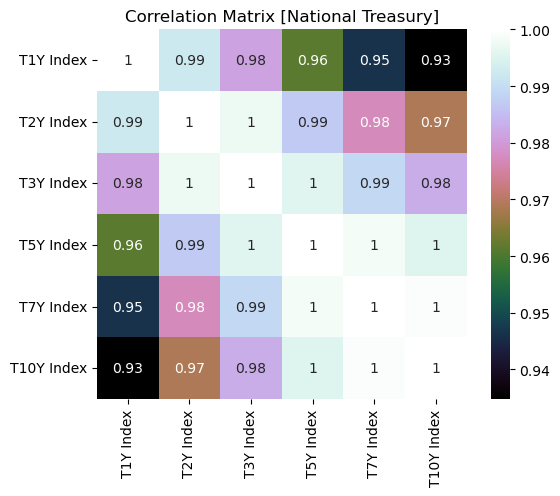

In [12]:
correlation = dataset.corr()
plt.title('Correlation Matrix [National Treasury]')
sns.heatmap(correlation, vmax=1, square=True, 
            annot=True, cmap='cubehelix');

- Heatmap of corrleation matrix above is showing every treasury bonds are highly related to each other, we will only choose T5Y to analyze entire dataset.

## Input Variable 2: Commercial with maturities
- The CP1M, CP3M, and CP6M indices represent the yields on commercial deed paper with maturities of 1, 3 and 6 months, respectively. 
- It is a short-term debt instrument issued by real-estate corporations and other entities to fund short-term financial needs. So, this is one of the way of levarage.

In [13]:
commercials = ['CP1M', 'CP3M', 'CP6M']
dataset = df[commercials]
dataset

,CP1M,CP3M,CP6M
0,9.75,9.95,10.01
1,9.74,9.90,9.96
2,9.72,9.85,9.87
3,9.86,9.95,9.98
4,9.77,9.76,9.71
...,...,...,...
218,5.61,5.71,5.79
219,5.61,5.69,5.78
220,5.60,5.65,5.69
221,5.56,5.57,5.60


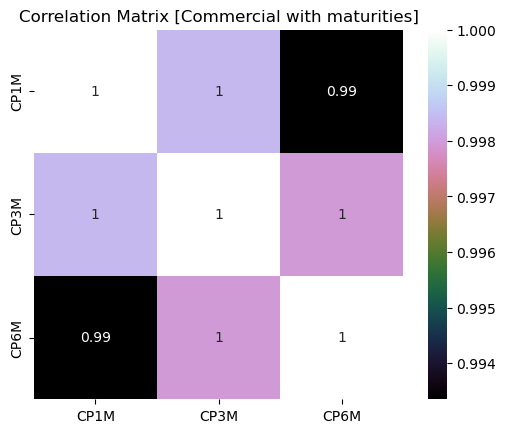

In [14]:
correlation = dataset.corr()
plt.title('Correlation Matrix [Commercial with maturities]')
sns.heatmap(correlation, vmax=1, square=True, 
            annot=True, cmap='cubehelix');

- Heatmap of corrleation matrix is showing interest of commercial deed are highly related to each other, we will only choose CP3M to analyze entire dataset.

## Input Variable 3: Index of Expected Future Inflation Rate

In [15]:
inflation = ['PCT 3MO FWD', 'PCT 6MO FWD', 'PCT 9MO FWD']
dataset = df[inflation]
dataset

,PCT 3MO FWD,PCT 6MO FWD,PCT 9MO FWD
0,0.011470,0.018060,0.024406
1,0.009298,0.014866,0.020612
2,0.010340,0.015455,0.020154
3,0.006720,0.013141,0.017409
4,0.005653,0.011451,0.016353
...,...,...,...
218,0.010095,0.019861,0.029813
219,0.008274,0.019316,0.028593
220,0.009142,0.019879,0.028379
221,0.009867,0.019917,0.029390


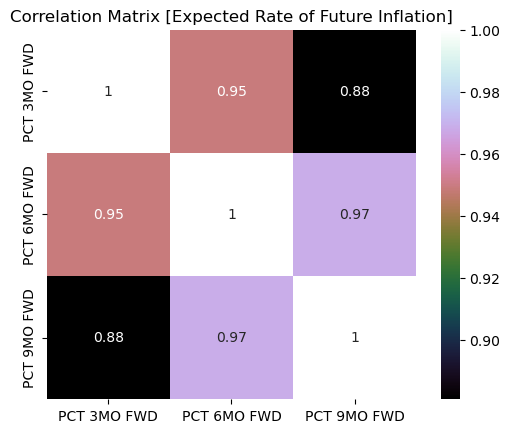

In [16]:
correlation = dataset.corr()
plt.title('Correlation Matrix [Expected Rate of Future Inflation]')
sns.heatmap(correlation, vmax=1, square=True, 
            annot=True, cmap='cubehelix');

- Heatmap of corrleation matrix is showing inflation indices are highly related to each other, we will only choose PCT 6MO FWD to analyze entire dataset.

## Target Variable: Coincident Economic Activity Index
- The USPHCI (U.S. Personal Consumption Expenditures Price Index) is a measure of inflation that tracks changes in the prices of goods and services purchased by households in the United States. It is considered to be a key measure of inflation, as it reflects the overall cost of living for American households, and a critical component to calculate GDP of U.S.

In [17]:
selected = ['T5Y Index', 'CP3M', 'PCT 6MO FWD', 'USPHCI']
dataset = df[selected]
dataset

,T5Y Index,CP3M,PCT 6MO FWD,USPHCI
0,9.20,9.95,0.018060,47.08
1,9.13,9.90,0.014866,47.32
2,9.20,9.85,0.015455,47.39
3,9.25,9.95,0.013141,47.62
4,9.24,9.76,0.011451,47.76
...,...,...,...,...
218,6.54,5.71,0.019861,78.26
219,6.76,5.69,0.019316,78.56
220,6.57,5.65,0.019879,78.76
221,6.38,5.57,0.019917,79.05


## Visualize Scatterplot matrix of Regression with 3 number of input variables and target

<Figure size 1500x1500 with 0 Axes>

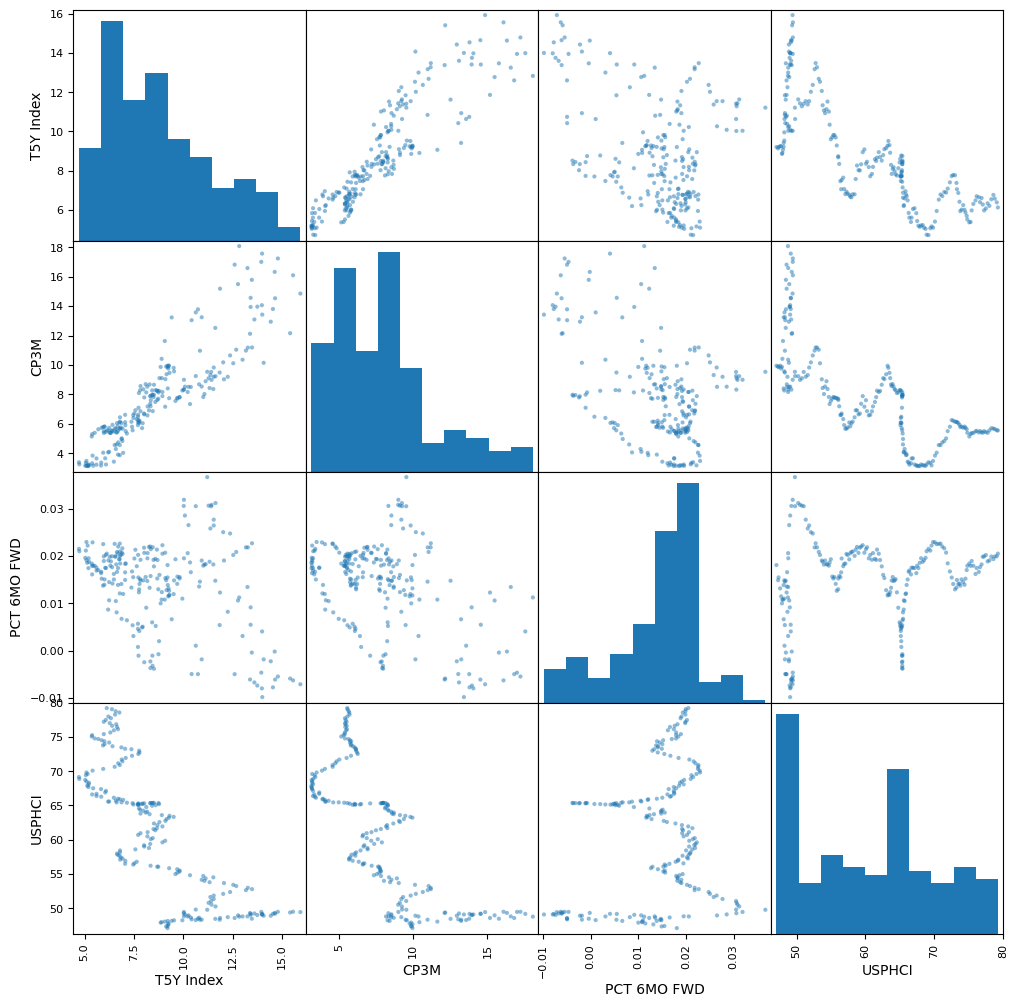

In [18]:
plt.figure(figsize=(15, 15))
scatter_matrix(dataset, figsize=(12, 12))
plt.show()

# 1-2. Construct Machine Learing models 

## Supervised Regression

- Linear models

In [19]:
models=[]
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))

- K-Nearest Regressor, KNN (K = 5)
- Deicision Tree Regressor
- Support Vector Machine

In [20]:
models.append(('KNN', KNeighborsRegressor())) 
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

## Ensemble Models
- Boosting methods

In [21]:
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))

- Bagging methods

In [22]:
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

# 1-3. Cross Validation 
- Cross Validation for selected multi-variate regression

## Split entire dataset into train and test dataset
- Input variables: T5Y Index, CP3M, PCT 6MO FWD
- Target variable: USPHCI
- USPHCI is the US Personal Consumption Expenditures (PCE) Price Index. It is an indicator used to measure the prices of goods and services purchased by consumers and is one of critical components of GDP calculation.

In [23]:
target = 'USPHCI'
X, y = dataset.drop(target, axis=1), dataset[[target]]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2)

In [24]:
y_train, y_test = y_train.values.ravel(), y_test.values.ravel()

## Compare ML models and Algorithms
- Select Regression model
- Perform K-folds for Cross Validation for every model, K = 10
- Measure of performance: negative mean squared error 

In [25]:
num_folds = 10
scoring = 'neg_mean_squared_error'

In [26]:
names = []
kfold_results = []

train_results = []
test_results = []
seed = 1

for name, model in models:
    
    # model specification
    names.append(name)
    
    # cross validation
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = -1 * cross_val_score(model, X_train, y_train,
                                     cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    
    # model training
    res = model.fit(X_train, y_train)
    
    # recording training results
    train_result = mean_squared_error(res.predict(X_train), y_train)
    train_results.append(train_result)
    
    # recording testing results
    test_result = mean_squared_error(res.predict(X_test), y_test)
    train_results.append(test_result)
    


## Visualize box plot of absolute value of Negative Mean Squared Error (NMSE) for every regressor

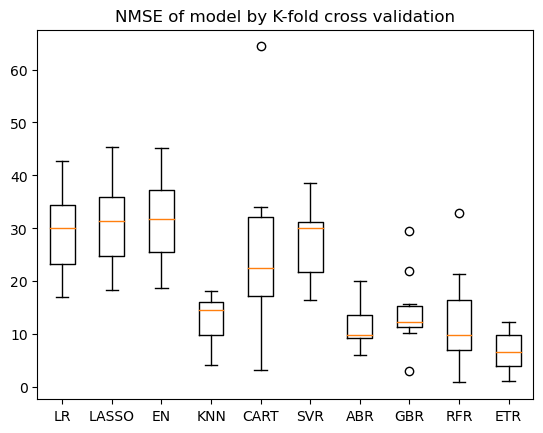

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.boxplot(kfold_results)
ax.set_xticklabels(names)

plt.title('NMSE of model by K-fold cross validation')
plt.show()
    

## Result Reports

- Linear models and Support Vector Machine are showing worst performances, but stable than other tree based models and its bagging and boosting. This is because linear models and SVM rarely show outliers of NMSE than tree based models, its bagging and boosting.

- DecisionTreeRegressor and its Boosting method like AdaBoostRegressor, GradientBoostRegressor are showing better performance than linear models, but its unstable range of error and sensitivity is shown. In multiple times of 10-fold cross validation, they used to show outliers of NMSE. Also, basically their IQR of NMSE is long even to cover interval of other models' NMSE.

- KNN is better than DecisionTreeRegressor and its boosting method in both performance and stableness. Although multiple times of 10-fold cross validation is launched, KNN never show outliers of NMSE and its IQR doesn't show radical adjustment. In other wise, KNN show consistency of model perfermormance (Robustness). 

- Bagging method like RandomForest and ExtraTreeRegressor is showing generally best than other models in performance but unstable than KNN because they also usually show outliers.

# 2. Linear Regression by Single Variable
- According to result report of multivarate regression part, linear models are worst. 
- However, T5Y Index and CP3M seems like linear relation on scatter plot matrix.

In [28]:
X, y = dataset[['T5Y Index']], dataset[['CP3M']].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2)

- Feature Scaling of Data Matrix X

In [29]:
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## 2.1 Linear Regression
- Use Linear Regression model
- Fit the line, Empirical Risk Minimization
- Report mean squared error of train and test error

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)
train_err = mean_squared_error(y_train, lr.predict(X_train))
test_err = mean_squared_error(y_test, lr.predict(X_test))
print('training error: {}'.format(train_err))
print('testing error: {}'.format(test_err))

training error: 2.0420685806432046
testing error: 2.4073755076004417


### Geometric Meaning: Visualization of Fitted Line upon Dataset

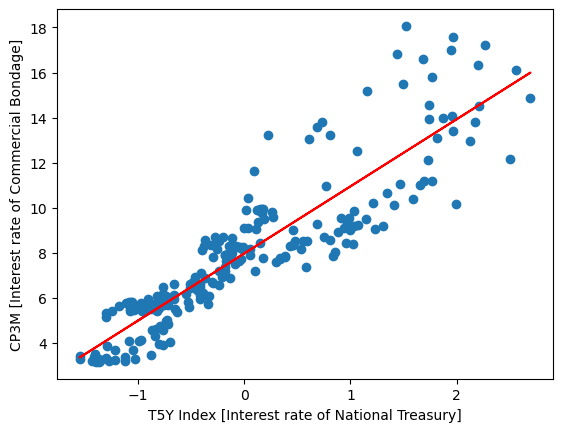

In [31]:
plt.scatter(X, y)
plt.plot(X_train, lr.predict(X_train), '-r');
plt.xlabel('T5Y Index [Interest rate of National Treasury]')
plt.ylabel('CP3M [Interest rate of Commercial Bondage]')
plt.show()

### Specify Model Paramters

In [32]:
weight = lr.coef_
bias = lr.intercept_
print('tangent of fitted line: {}'.format(weight))
print('intercept of fitted line: {}'.format(bias))

tangent of fitted line: [2.98117436]
intercept of fitted line: 7.960378924874643


## 2.2 Elastic Net
- Use Elastic Net as ML model
- Fit the line, Empirical Risk Minimization
- Report mean squared error of training and testing dataset
- Fix T1-regularizer, l1_ratio = 0.5 
- Compare the error by tweaking T2-regularizer, alpha
- Find best bias-varaince tradesoff through learning curve for each alpha

## Fuction to Visualize Learning Curve

In [33]:
def plot_learning_curve(model):

    sizes = np.linspace(0.1, 1.0, 100)
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                           X=X_train,
                                                           y=y_train,
                                                           train_sizes=sizes,
                                                           cv=10,
                                                           n_jobs=1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(sizes, train_mean,
            color='blue', marker='o', 
            markersize=5, label='training accuracy')

    plt.fill_between(sizes, 
                    train_mean + train_std, 
                    train_mean - train_std, 
                    alpha=0.15, color='blue')

    plt.plot(sizes, test_mean,
            color='green', marker='s', 
            markersize=5, label='validation accuracy')

    plt.fill_between(sizes, 
                    test_mean + test_std, 
                    test_mean - test_std, 
                    alpha=0.15, color='green')

    plt.ylabel("Accuracy")
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

### alpha = 0.1

training error: 2.079539482201242
testing error: 2.462324821340727


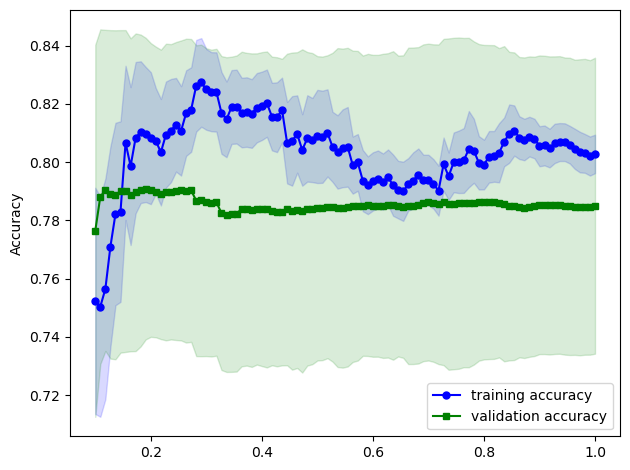

In [34]:
elanet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elanet.fit(X_train, y_train)
train_err = mean_squared_error(y_train, elanet.predict(X_train))
test_err = mean_squared_error(y_test, elanet.predict(X_test))
print('training error: {}'.format(train_err))
print('testing error: {}'.format(test_err))
plot_learning_curve(elanet)

### alpha = 0.5

training error: 2.6936534498478992
testing error: 3.2554252227146256


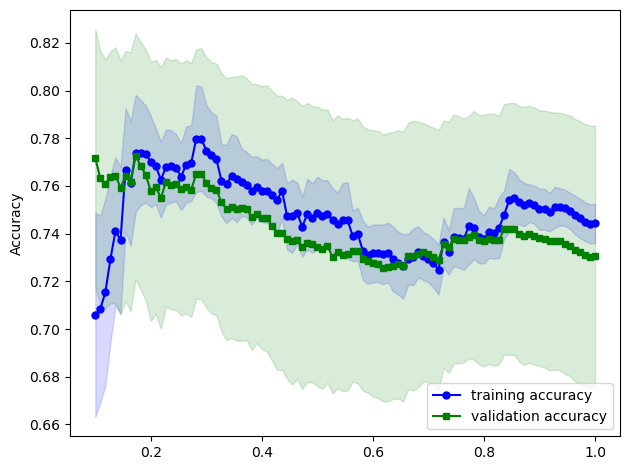

In [35]:
elanet = ElasticNet(alpha=0.5, l1_ratio=0.5)
elanet.fit(X_train, y_train)
train_err = mean_squared_error(y_train, elanet.predict(X_train))
test_err = mean_squared_error(y_test, elanet.predict(X_test))
print('training error: {}'.format(train_err))
print('testing error: {}'.format(test_err))
plot_learning_curve(elanet)

### alpha = 1.0

training error: 3.829629264863211
testing error: 4.697064874576725


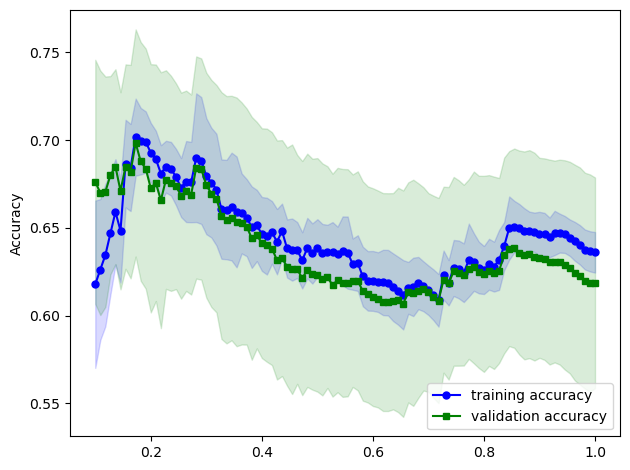

In [36]:
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)
elanet.fit(X_train, y_train)
train_err = mean_squared_error(y_train, elanet.predict(X_train))
test_err = mean_squared_error(y_test, elanet.predict(X_test))
print('training error: {}'.format(train_err))
print('testing error: {}'.format(test_err))
plot_learning_curve(elanet)

## Result Report

- Specially, if mean squared error of testing error is lower than that of training error at linear regression, elastic net consistently show good tradesoff no matter what T2-regularizer alpha is. This is ideal case of linear model training.
- However, if mean squared error of testing error is bigger than that of training error at linear regression, we need to tweak hyperparamters, that are T1, T2 regularizers. In given dataset, adaptable hyperparameters are extremly relying on results of train_test_split.
- Therfore, we need to gather more data or RANSAC algorithms to resolve issue by constructing robust linear models.

# 3. Decision Tree Regressor for Nonlinear Pattern of Dataset
- According to result report of linear regression, treasury securities issued by Treasury Department U.S [T5Y Index] and commerical bondage [CP3M] are on linear relationship. If we demonstrate nonlinear relationship between U.S. Personal Consumption Expenditures Price Index [USPHCI] and [T5Y Index], it can be generalized between [USPHCI] and [CP3M].
- Input Variable: [USPHCI]
- Target Variable: [T5Y Index]


In [37]:
X, y = dataset[['USPHCI']].values, dataset[['T5Y Index']].values.ravel()

In [38]:
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

## 3.1 DecisionTreeRegression
- Use Decision Tree Regression model
- Fit the nonlinear line, Empirical Risk Minimization
- Report mean squared error of training error
- Testing different max_depth of tree to find best bias tradeoff
- Obeserve approximation to smooth nonlinear curve, depending upon increasing max_depth

## max_depth = 3 [Underfitting]
- It seems to be underfitted around USPHCI = 50

training error [MSE]: 0.9052983265423056


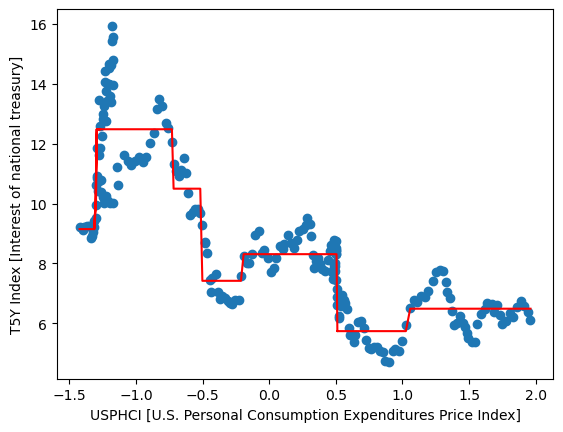

In [39]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

train_err = mean_squared_error(y, tree.predict(X))
print('training error [MSE]: {}'.format(train_err))

plt.scatter(X, y)
plt.plot(X, tree.predict(X), '-r');
plt.xlabel('USPHCI [U.S. Personal Consumption Expenditures Price Index]')
plt.ylabel('T5Y Index [Interest of national treasury]')
plt.show()

## max_depth = 5 [Best Tradeoff]
- It is entirely better to detect nonlinear pattern
- Especially, line starts to be fitted around USPHCI = 50

training error [MSE]: 0.4932478687988695


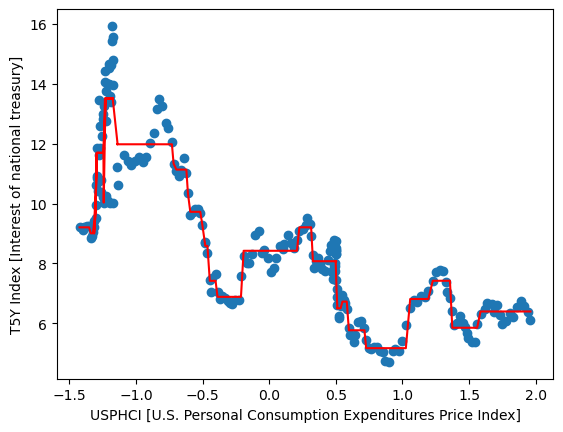

In [40]:
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X, y)

train_err = mean_squared_error(y, tree.predict(X))
print('training error [MSE]: {}'.format(train_err))

plt.scatter(X, y)
plt.plot(X, tree.predict(X), '-r');
plt.xlabel('USPHCI [U.S. Personal Consumption Expenditures Price Index]')
plt.ylabel('T5Y Index [Interest of national treasury]')
plt.show()

## max_depth = 7 [Overfitting]
- Line is completely fitted into nonlinealy scattered plot around USPHCI = 50
- However, there is a risk to be overfitted on this dataset and test error will increse for future unseen data

training error [MSE]: 0.39037293013414087


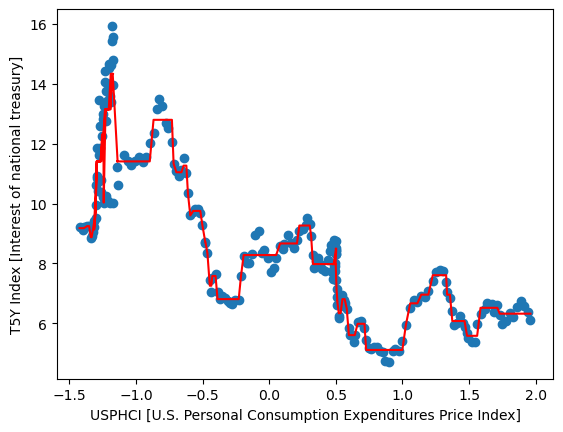

In [41]:
tree = DecisionTreeRegressor(max_depth=6)
tree.fit(X, y)

train_err = mean_squared_error(y, tree.predict(X))
print('training error [MSE]: {}'.format(train_err))

plt.scatter(X, y)
plt.plot(X, tree.predict(X), '-r');
plt.xlabel('USPHCI [U.S. Personal Consumption Expenditures Price Index]')
plt.ylabel('T5Y Index [Interest of national treasury]')
plt.show()

## 3.2 Regression Ensemble through Boostrap Sampling
- In 3.1, we had adjusted max_depth of single DecisionTreeRegressor to find best bias-tradeoff
- BaggingRegressor consist of unpruned 500 number of DecisionTreeRegressors trained upon sampled sub-trainng set with replacement
- It shows far better performance compared to single DecisionTreeRegressor

In [42]:
tree = DecisionTreeRegressor(random_state=1,
                              max_depth=None)
bag = BaggingRegressor(base_estimator=tree, 
                      n_estimators=500,
                      max_samples=1.0,
                      max_features=1.0,
                      bootstrap=True,
                      bootstrap_features=False,
                      n_jobs=1,
                      random_state=1)
bag.fit(X, y)

bagging_train_err = mean_squared_error(y, bag.predict(X))
print('training error of Ensemble [MSE]: {}'.format(bagging_train_err))

training error of Ensemble [MSE]: 0.11017228189884591


## 3.3 Adaboost Ensemble Regressor consist of Weak Learners
- In 3.2, max_depth of DecisionTreeRegressors constituting Ensemble was not limited.
- However, adaboost consist of weak learners, that are DecisionTreeRegressors with max_depth = 1.

In [43]:
weak_lr = DecisionTreeRegressor(random_state=2, 
                               max_depth=1)
ada = AdaBoostRegressor(base_estimator=weak_lr,
                       n_estimators=500, 
                       learning_rate=0.1,
                       random_state=2)
ada.fit(X, y)

ada_train_err = mean_squared_error(y, ada.predict(X))
print('training error of AdaBoost [MSE]: {}'.format(ada_train_err))

training error of AdaBoost [MSE]: 2.13919452061752


# 4. 2-Dimensional KNN & SVM Regressors for 3D Visualization of Hyperplane 
- Input Variable: [T5Y Index], [CP3M]
- Target Variable: [USPHCI]

### Data Preprocessing and Scaling

In [44]:
X = dataset[['T5Y Index', 'CP3M']].values
y = dataset[['USPHCI']].values.ravel()

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2)

### Function to Plot Hyperplane of Regressor

In [45]:
def plot_hyperplane(X, y, model):
    
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # plot the hyperplane in 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap=plt.cm.Paired)
    ax.plot_surface(xx, yy, Z.reshape(xx.shape), alpha=0.4)

    ax.set_xlabel('[T5Y Index]')
    ax.set_ylabel('[CP3M]')
    ax.set_zlabel('[PCT 6MO FWD]')

    ax.view_init(elev=30, azim=60)
    plt.show()

### KNN Regressor, K = 10

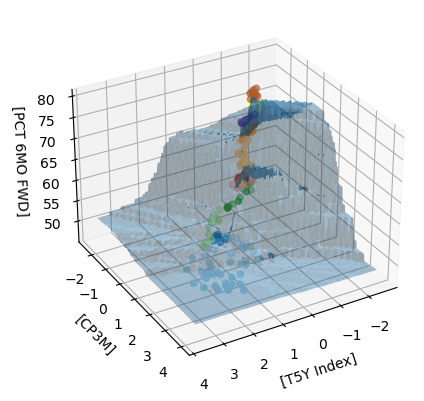

In [46]:
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(X_train, y_train)
plot_hyperplane(X, y, model=neigh)

### RBF (Gaussian) Kernel SVM Regressor

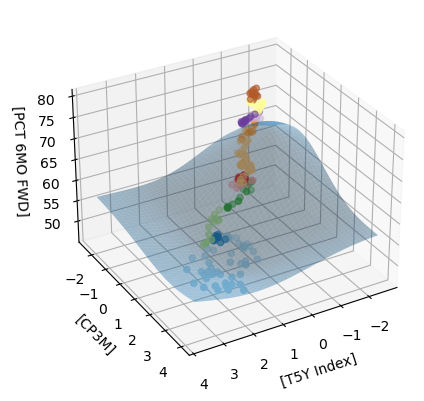

In [47]:
SVM = SVR(kernel='rbf', gamma=0.2, C=1.0)
SVM.fit(X_train, y_train)
plot_hyperplane(X, y, model=SVM)

## Result Report
- RBF kernel SVM regressor make more soft hyperplane than that of KNN regressor